# Dados Petrobras

In [1]:
import pandas as pd
from pandas_datareader import data as web
df = web.DataReader(f'PETR4.SA', data_source='yahoo', start=f'05-01-2021', end =f'05-31-2022')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,23.809999,23.299999,23.799999,23.430000,49039900.0,16.146547
2021-05-04,23.639999,22.879999,23.540001,22.889999,44765000.0,15.774411
2021-05-05,23.950001,23.120001,23.170000,23.830000,75611900.0,16.422203
2021-05-06,23.850000,23.400000,23.709999,23.500000,54091600.0,16.194788
2021-05-07,24.450001,23.459999,23.639999,24.379999,74118200.0,16.801229
...,...,...,...,...,...,...
2022-05-25,32.279999,31.260000,31.700001,32.049999,69991900.0,32.049999
2022-05-26,32.560001,31.950001,32.020000,32.130001,78303600.0,32.130001
2022-05-27,32.150002,30.570000,32.150002,30.600000,118295600.0,30.600000


In [2]:
a_renomear = {
    'High': 'alta',
    'Low': 'baixa',
    'Open': 'abertura',
    'Close': 'fechamento',
    'Volume': 'volume',
    'Adj Close': 'ajuste_fechamento',
    
}

In [3]:
df = df.rename(columns=a_renomear)
df.head()

,alta,baixa,abertura,fechamento,volume,ajuste_fechamento
Date,,,,,,
2021-05-03,23.809999,23.299999,23.799999,23.430000,49039900.0,16.146547
2021-05-04,23.639999,22.879999,23.540001,22.889999,44765000.0,15.774411
2021-05-05,23.950001,23.120001,23.170000,23.830000,75611900.0,16.422203
2021-05-06,23.850000,23.400000,23.709999,23.500000,54091600.0,16.194788
2021-05-07,24.450001,23.459999,23.639999,24.379999,74118200.0,16.801229


# Dados para alteração

In [4]:
df['meta'] = ''

In [5]:
df.loc[df.ajuste_fechamento >= 29.000000,'meta'] = 1
df.loc[df.ajuste_fechamento <= 28.999999,'meta'] = 0
df

,alta,baixa,abertura,fechamento,volume,ajuste_fechamento,meta
Date,,,,,,,
2021-05-03,23.809999,23.299999,23.799999,23.430000,49039900.0,16.146547,0
2021-05-04,23.639999,22.879999,23.540001,22.889999,44765000.0,15.774411,0
2021-05-05,23.950001,23.120001,23.170000,23.830000,75611900.0,16.422203,0
2021-05-06,23.850000,23.400000,23.709999,23.500000,54091600.0,16.194788,0
2021-05-07,24.450001,23.459999,23.639999,24.379999,74118200.0,16.801229,0
...,...,...,...,...,...,...,...
2022-05-25,32.279999,31.260000,31.700001,32.049999,69991900.0,32.049999,1
2022-05-26,32.560001,31.950001,32.020000,32.130001,78303600.0,32.130001,1
2022-05-27,32.150002,30.570000,32.150002,30.600000,118295600.0,30.600000,1


<AxesSubplot:xlabel='meta', ylabel='ajuste_fechamento'>

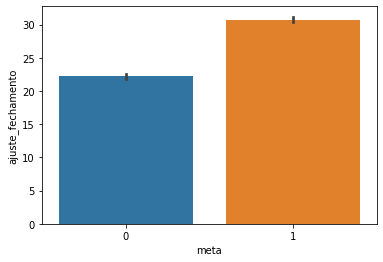

In [10]:
# Meta Batida?
import seaborn as sns
sns.barplot(x = 'meta', y = 'ajuste_fechamento', data = df)

In [7]:
x = df[['alta', 'baixa']]
y = df['meta']
y = y.astype('int')

In [8]:
#modelo linear
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25)

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('Treinamos o modelo com %d elementos e testamos com %d elementos' %(len(treino_x), len(teste_x)))
print('O indice de acertos foi de %.2f%%' % acuracia)

Treinamos o modelo com 202 elementos e testamos com 68 elementos
O indice de acertos foi de 92.65%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
#modelo não linear
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('Treinamos o modelo com %d elementos e testamos com %d elementos' %(len(treino_x), len(teste_x)))
print('O indice de acertos foi de %.2f%%' % acuracia)

Treinamos o modelo com 202 elementos e testamos com 68 elementos
O indice de acertos foi de 92.65%
